<a href="https://colab.research.google.com/github/LAIBAASIM555/CodeAlpha-Iris-Flower-Classification/blob/main/Iris_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


In [15]:
# Load the dataset
df = pd.read_csv('/content/Iris.csv') # Load your dataset into a Pandas DataFrame named 'df'


In [16]:
# Convert the relevant columns to numeric, forcing errors to NaN if any invalid entries
df['SepalLengthCm'] = pd.to_numeric(df['SepalLengthCm'], errors='coerce') # Changed 'Sepal length' to 'SepalLengthCm'
df['SepalWidthCm'] = pd.to_numeric(df['SepalWidthCm'], errors='coerce') # Changed 'Sepal with' to 'SepalWidthCm'
df['PetalLengthCm'] = pd.to_numeric(df['PetalLengthCm'], errors='coerce') # Changed 'Petal length' to 'PetalLengthCm'
df['PetalWidthCm'] = pd.to_numeric(df['PetalWidthCm'], errors='coerce') # Changed 'Petal width' to 'PetalWidthCm'

In [18]:
# Check for any missing values created by the conversion
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [19]:
# Drop rows with missing values (if any)
df = df.dropna()

In [20]:
# Now check the data types
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


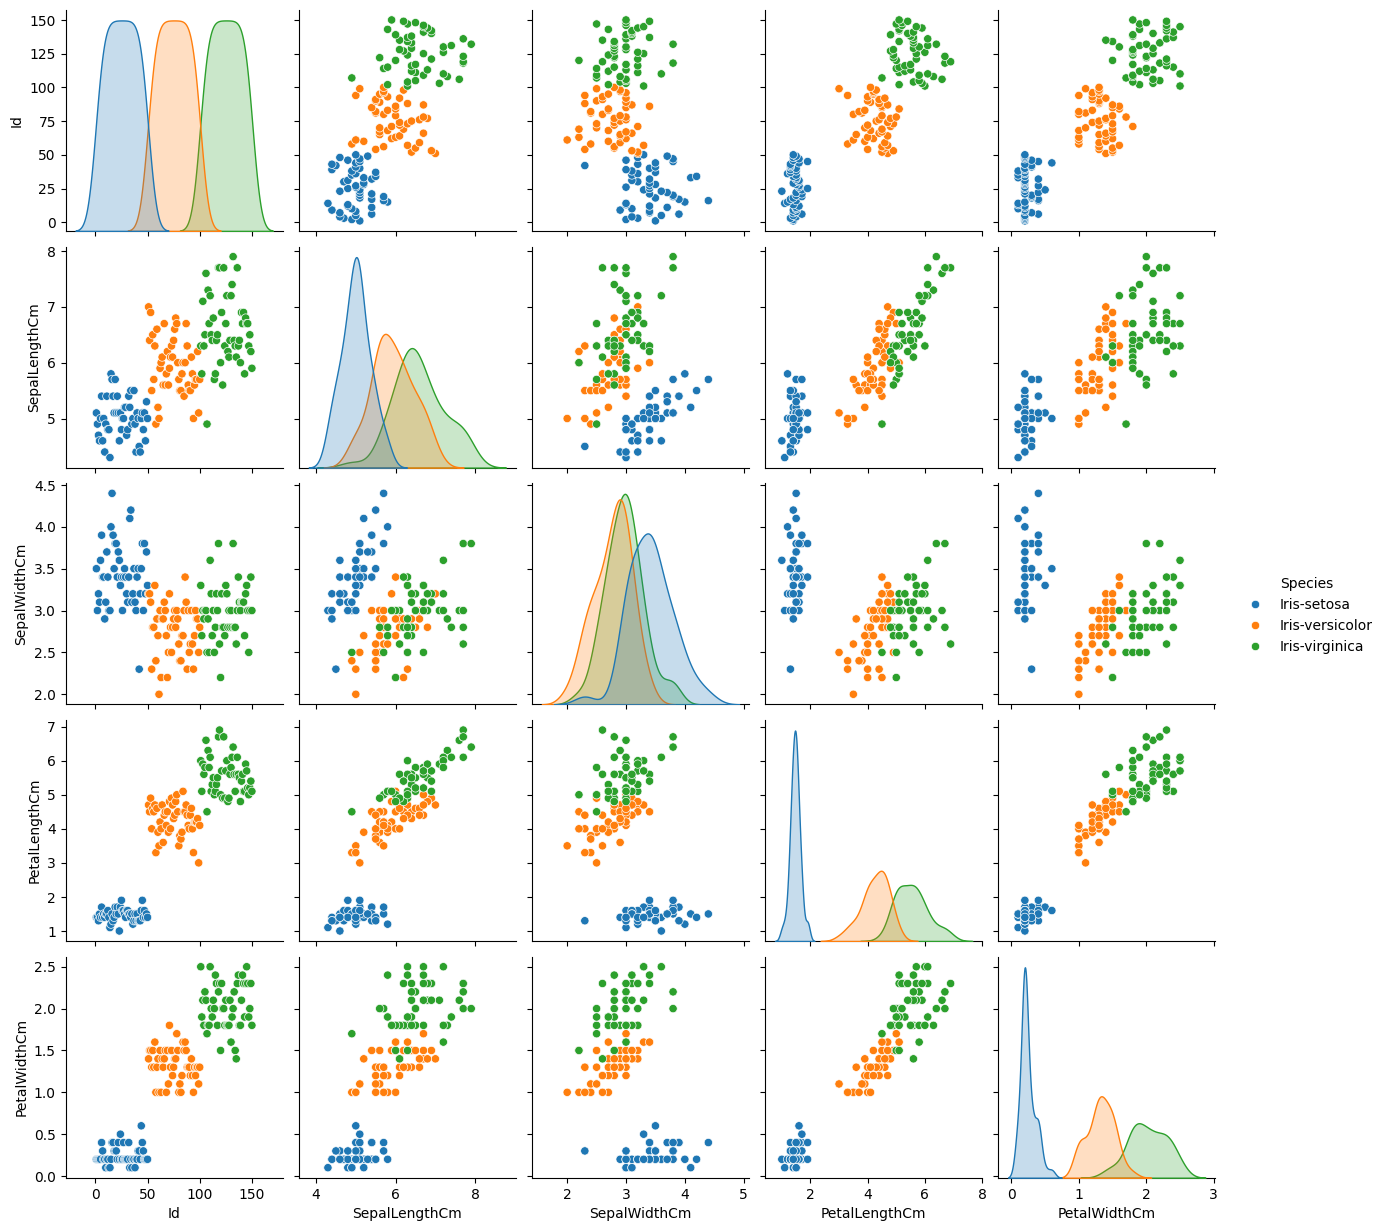

In [22]:
# Visualize dataset with 'Species' as hue
sns.pairplot(df, hue='Species')

# Show plot
plt.show()

In [25]:
# Separate features and target
data = df.values

x = data[:, 1:5]
y = data[:, 5]

print (x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [27]:
# Split data to train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_test)

[[5.7 2.8 4.5 1.3]
 [7.7 3.8 6.7 2.2]
 [5.5 2.6 4.4 1.2]
 [6.5 3.0 5.5 1.8]
 [6.1 3.0 4.9 1.8]
 [6.3 2.7 4.9 1.8]
 [5.0 3.2 1.2 0.2]
 [5.8 4.0 1.2 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 2.7 5.3 1.9]
 [6.6 3.0 4.4 1.4]
 [7.4 2.8 6.1 1.9]
 [6.4 2.8 5.6 2.2]
 [6.4 2.8 5.6 2.1]
 [6.5 3.0 5.2 2.0]
 [6.3 3.3 6.0 2.5]
 [6.7 3.0 5.2 2.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.4 1.5 0.2]
 [5.1 3.4 1.5 0.2]
 [4.7 3.2 1.3 0.2]
 [5.1 2.5 3.0 1.1]
 [5.7 3.0 4.2 1.2]
 [4.6 3.4 1.4 0.3]
 [6.1 2.8 4.0 1.3]
 [5.0 3.4 1.6 0.4]
 [6.8 3.2 5.9 2.3]
 [4.5 2.3 1.3 0.3]
 [6.9 3.1 5.1 2.3]
 [6.2 3.4 5.4 2.3]]


In [28]:
# Support vector and machine learning model
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

SVC()

In [29]:
predictional = model.predict(x_test)
print(predictional)

['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica']


In [32]:
# Calculate the acuuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictional)*100)
for i in range(len(predictional)):
  print(predictional[i], y_test[i])

100.0
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica


In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
prediction2 = model.predict(x_test)
print(prediction2)

['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica']


In [35]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction2)*100)
for i in range(len(prediction2)):
  print(prediction2[i], y_test[i])

100.0
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica


In [36]:
# Descision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [37]:
prediction3 = model.predict(x_test)
print(prediction3)

['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica']


In [38]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction3)*100)
for i in range(len(prediction3)):
  print(prediction3[i], y_test[i])

100.0
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica


In [39]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction3))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [40]:
x_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])
prediction = model.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
